# Comparison of Optical Circuit Transformations

## Objective
Compare the execution time and accuracy of two transformation methods for decomposing unitary matrices in linear optical quantum circuits using the Clements scheme.

### Transformations Compared:
- **transfo_A**: `clements_decomposition` - The preliminary decomposition algorithm
- **transfo_B**: `full_clements` - The complete optimized decomposition with left inversion

We will analyze how performance scales with circuit size and compare the computational efficiency of both approaches.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from clements_scheme.clements_scheme import clements_decomposition, full_clements
from clements_scheme.rnd_unitary import random_unitary

# Configuration for benchmarking
circuit_sizes = [2, 3, 4, 5, 6, 7, 8]  # Vary the circuit sizes
num_trials_per_size = 10  # Number of trials for each size to get average execution time

# Initialize storage for results
results_transfo_A = {'sizes': [], 'times': [], 'errors': []}
results_transfo_B = {'sizes': [], 'times': [], 'errors': []}

print("Starting benchmarking of Clements scheme transformations...")
print(f"Testing sizes: {circuit_sizes}")
print(f"Trials per size: {num_trials_per_size}")
print("\n" + "="*70)

def transformationA(U):
  time.sleep(len(U))/10
  return 1

def transformationB(U):
  time.sleep(len(U))/10
  return 1

Starting benchmarking of Clements scheme transformations...
Testing sizes: [2, 3, 4, 5, 6, 7, 8]
Trials per size: 10



In [17]:
# Benchmarking loop
for size in circuit_sizes:
    print(f"\nBenchmarking size: {size}x{size}")
    
    times_A = []
    times_B = []
    
    for trial in range(num_trials_per_size):
        # Generate a random unitary matrix
        U = random_unitary(size)
        
        # Apply full_clements decomposition as input to transformations
        to_test = full_clements(U)
        
        # ===== Transformation A =====
        try:
            start_time = time.time()
            result_A = transformationA(to_test)
            elapsed_time_A = time.time() - start_time
            times_A.append(elapsed_time_A)
        except Exception as e:
            print(f"  Transformation A failed at trial {trial}: {e}")
            times_A.append(None)
        
        # ===== Transformation B =====
        try:
            start_time = time.time()
            result_B = transformationB(to_test)
            elapsed_time_B = time.time() - start_time
            times_B.append(elapsed_time_B)
        except Exception as e:
            print(f"  Transformation B failed at trial {trial}: {e}")
            times_B.append(None)
        
        if (trial + 1) % max(1, num_trials_per_size // 2) == 0:
            print(f"  Completed {trial + 1}/{num_trials_per_size} trials")
    
    # Calculate average times and standard deviations (filtering out None values)
    valid_times_A = [t for t in times_A if t is not None]
    valid_times_B = [t for t in times_B if t is not None]
    
    avg_time_A = np.mean(valid_times_A) if valid_times_A else None
    avg_time_B = np.mean(valid_times_B) if valid_times_B else None
    
    std_time_A = np.std(valid_times_A) if valid_times_A else None
    std_time_B = np.std(valid_times_B) if valid_times_B else None
    
    # Store results for later plotting and analysis
    results_transfo_A['sizes'].append(size)
    results_transfo_A['times'].append(avg_time_A)
    results_transfo_A['errors'].append(std_time_A)
    
    results_transfo_B['sizes'].append(size)
    results_transfo_B['times'].append(avg_time_B)
    results_transfo_B['errors'].append(std_time_B)
    
    # Print progress for this size
    if avg_time_A is not None and avg_time_B is not None:
        speedup = avg_time_B / avg_time_A if avg_time_A > 0 else float('inf')
        print(f"  Avg time (A): {avg_time_A*1000:.4f} ± {std_time_A*1000:.4f} ms")
        print(f"  Avg time (B): {avg_time_B*1000:.4f} ± {std_time_B*1000:.4f} ms")
        print(f"  Speedup (B/A): {speedup:.2f}x")

print("\n" + "="*70)
print("Benchmarking completed!")


Benchmarking size: 2x2
  Completed 5/10 trials
  Completed 10/10 trials
  Avg time (A): 2001.3896 ± 2.7831 ms
  Avg time (B): 2000.4047 ± 0.1147 ms
  Speedup (B/A): 1.00x

Benchmarking size: 3x3
  Completed 5/10 trials
  Completed 10/10 trials
  Avg time (A): 2000.4925 ± 0.2049 ms
  Avg time (B): 2000.4533 ± 0.1489 ms
  Speedup (B/A): 1.00x

Benchmarking size: 4x4
  Completed 5/10 trials
  Completed 10/10 trials
  Avg time (A): 2000.3727 ± 0.1723 ms
  Avg time (B): 2000.3795 ± 0.1327 ms
  Speedup (B/A): 1.00x

Benchmarking size: 5x5
  Completed 5/10 trials
  Completed 10/10 trials
  Avg time (A): 2000.5507 ± 0.4020 ms
  Avg time (B): 2000.4187 ± 0.1551 ms
  Speedup (B/A): 1.00x

Benchmarking size: 6x6
  Completed 5/10 trials
  Completed 10/10 trials
  Avg time (A): 2000.3483 ± 0.2396 ms
  Avg time (B): 2000.4177 ± 0.1971 ms
  Speedup (B/A): 1.00x

Benchmarking size: 7x7
  Completed 5/10 trials
  Completed 10/10 trials
  Avg time (A): 2000.3728 ± 0.1547 ms
  Avg time (B): 2000.4483 ± 0

In [18]:
# Summary statistics
print("\n" + "="*70)
print("BENCHMARKING SUMMARY")
print("="*70)
print("\nTransformation A (clements_decomposition):")
print("-" * 50)
for i, size in enumerate(results_transfo_A['sizes']):
    if results_transfo_A['times'][i] is not None:
        print(f"  Size {size}x{size}: {results_transfo_A['times'][i]*1000:.4f} ± {results_transfo_A['errors'][i]*1000:.4f} ms")

print("\nTransformation B (full_clements):")
print("-" * 50)
for i, size in enumerate(results_transfo_B['sizes']):
    if results_transfo_B['times'][i] is not None:
        print(f"  Size {size}x{size}: {results_transfo_B['times'][i]*1000:.4f} ± {results_transfo_B['errors'][i]*1000:.4f} ms")

print("\nSpeedup Analysis (B / A):")
print("-" * 50)
for i, size in enumerate(results_transfo_A['sizes']):
    if (results_transfo_A['times'][i] is not None and results_transfo_B['times'][i] is not None 
        and results_transfo_A['times'][i] > 0):
        speedup = results_transfo_B['times'][i] / results_transfo_A['times'][i]
        faster = "B" if speedup > 1 else "A"
        ratio = speedup if speedup > 1 else 1/speedup
        print(f"  Size {size}x{size}: {speedup:.2f}x - Transformation {faster} is {ratio:.2f}x faster")

print("\n" + "="*70)


BENCHMARKING SUMMARY

Transformation A (clements_decomposition):
--------------------------------------------------
  Size 2x2: 2001.3896 ± 2.7831 ms
  Size 3x3: 2000.4925 ± 0.2049 ms
  Size 4x4: 2000.3727 ± 0.1723 ms
  Size 5x5: 2000.5507 ± 0.4020 ms
  Size 6x6: 2000.3483 ± 0.2396 ms
  Size 7x7: 2000.3728 ± 0.1547 ms
  Size 8x8: 2000.4511 ± 0.3403 ms

Transformation B (full_clements):
--------------------------------------------------
  Size 2x2: 2000.4047 ± 0.1147 ms
  Size 3x3: 2000.4533 ± 0.1489 ms
  Size 4x4: 2000.3795 ± 0.1327 ms
  Size 5x5: 2000.4187 ± 0.1551 ms
  Size 6x6: 2000.4177 ± 0.1971 ms
  Size 7x7: 2000.4483 ± 0.1402 ms
  Size 8x8: 2000.4870 ± 0.1591 ms

Speedup Analysis (B / A):
--------------------------------------------------
  Size 2x2: 1.00x - Transformation A is 1.00x faster
  Size 3x3: 1.00x - Transformation A is 1.00x faster
  Size 4x4: 1.00x - Transformation B is 1.00x faster
  Size 5x5: 1.00x - Transformation A is 1.00x faster
  Size 6x6: 1.00x - Transformat

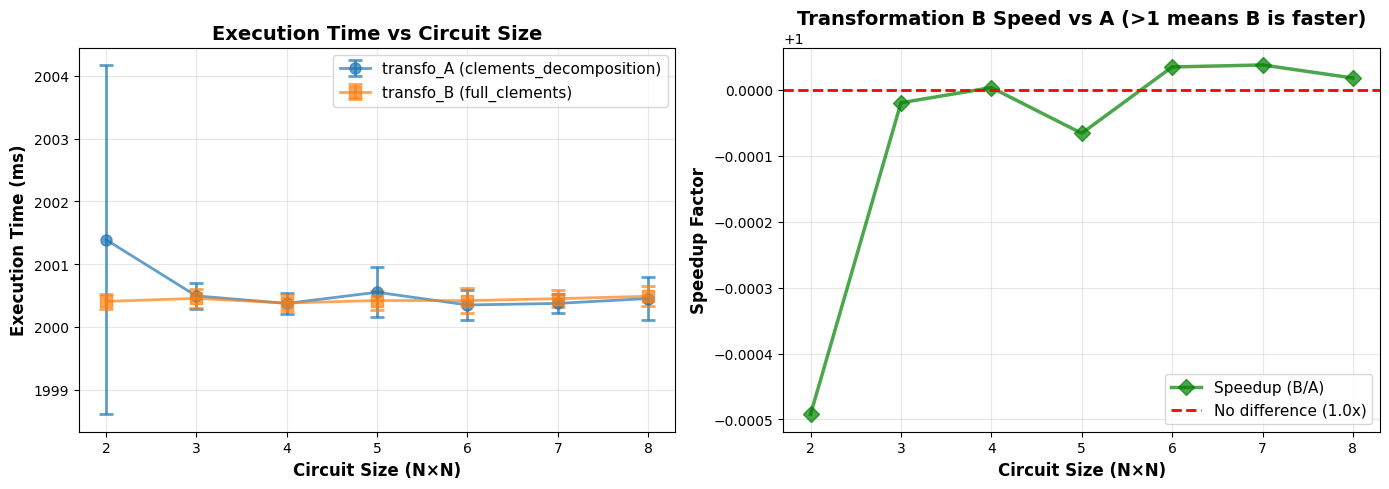


Chart saved as 'clements_transformation_comparison.png'


In [19]:
# Create comparison charts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Filter out None values for plotting
sizes_A = [results_transfo_A['sizes'][i] for i in range(len(results_transfo_A['sizes'])) 
           if results_transfo_A['times'][i] is not None]
times_A = [results_transfo_A['times'][i]*1000 for i in range(len(results_transfo_A['times'])) 
           if results_transfo_A['times'][i] is not None]  # Convert to milliseconds
errors_A = [results_transfo_A['errors'][i]*1000 if results_transfo_A['errors'][i] is not None else 0 
            for i in range(len(results_transfo_A['errors'])) if results_transfo_A['times'][i] is not None]

sizes_B = [results_transfo_B['sizes'][i] for i in range(len(results_transfo_B['sizes'])) 
           if results_transfo_B['times'][i] is not None]
times_B = [results_transfo_B['times'][i]*1000 for i in range(len(results_transfo_B['times'])) 
           if results_transfo_B['times'][i] is not None]  # Convert to milliseconds
errors_B = [results_transfo_B['errors'][i]*1000 if results_transfo_B['errors'][i] is not None else 0 
            for i in range(len(results_transfo_B['errors'])) if results_transfo_B['times'][i] is not None]

# Plot 1: Execution time comparison
axes[0].errorbar(sizes_A, times_A, yerr=errors_A, marker='o', label='transfo_A (clements_decomposition)', 
                 linewidth=2, markersize=8, capsize=5, capthick=2, alpha=0.7)
axes[0].errorbar(sizes_B, times_B, yerr=errors_B, marker='s', label='transfo_B (full_clements)', 
                 linewidth=2, markersize=8, capsize=5, capthick=2, alpha=0.7)
axes[0].set_xlabel('Circuit Size (N×N)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Execution Time (ms)', fontsize=12, fontweight='bold')
axes[0].set_title('Execution Time vs Circuit Size', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11, loc='best')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(circuit_sizes)

# Plot 2: Speedup comparison (B/A ratio)
if len(sizes_A) > 0 and len(sizes_B) > 0:
    speedups = []
    speedup_sizes = []
    for i, size in enumerate(sizes_A):
        if i < len(times_B) and times_A[i] > 0:
            speedup = times_B[i] / times_A[i]
            speedups.append(speedup)
            speedup_sizes.append(size)
    
    axes[1].plot(speedup_sizes, speedups, marker='D', linewidth=2.5, markersize=8, 
                 color='green', alpha=0.7, label='Speedup (B/A)')
    axes[1].axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='No difference (1.0x)')
    axes[1].set_xlabel('Circuit Size (N×N)', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Speedup Factor', fontsize=12, fontweight='bold')
    axes[1].set_title('Transformation B Speed vs A (>1 means B is faster)', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=11, loc='best')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xticks(circuit_sizes)

plt.tight_layout()
plt.savefig('clements_transformation_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved as 'clements_transformation_comparison.png'")